In [12]:
import sympy as sm
import inspect
from IPython.display import display, Math

### PDE solving

$$\large ( (\varphi)_{ll}(\varphi)_{lt} + (\varphi)_{l} (\varphi)_{ltl} )_{ll}$$

In [3]:
l,t = sm.symbols("l t")
phi = sm.Function('phi')(l,t)

In [4]:
def display_expr(expr):
    frame = inspect.currentframe()
    frame = inspect.getouterframes(frame)[1]
    string = inspect.getframeinfo(frame[0]).code_context[0].strip()
    args = string[string.find('(') + 1:-1].split(',')
    
    names = []
    for i in args:
        if i.find('=') != -1:
            names.append(i.split('=')[1].strip())
        
        else:
            names.append(i)
    # if names[0]=='dphidl':
    #     names[0] = '\\Sigma'
    expr = expr.xreplace({n : round(n, 3) for n in expr.atoms(sm.Number)})
    str = sm.latex(expr)
    str = str.replace('\\phi','\\varphi')

    print(str)
    display(Math(names[0] + '=' + str))    

In [5]:
f = sm.diff(phi,l,2)*sm.diff(sm.diff(phi,l,1),t)+sm.diff(phi,l)*sm.diff(sm.diff(phi,l,2),t)
f_1 = sm.diff(f,l,2) 
display_expr(f_1)

\frac{\partial}{\partial l} \varphi{\left(l,t \right)} \frac{\partial^{5}}{\partial t\partial l^{4}} \varphi{\left(l,t \right)} + 3 \frac{\partial^{2}}{\partial l^{2}} \varphi{\left(l,t \right)} \frac{\partial^{4}}{\partial t\partial l^{3}} \varphi{\left(l,t \right)} + 3 \frac{\partial^{3}}{\partial l^{3}} \varphi{\left(l,t \right)} \frac{\partial^{3}}{\partial t\partial l^{2}} \varphi{\left(l,t \right)} + \frac{\partial^{4}}{\partial l^{4}} \varphi{\left(l,t \right)} \frac{\partial^{2}}{\partial t\partial l} \varphi{\left(l,t \right)}


<IPython.core.display.Math object>

### Polynomial coeficients finding for Bubnov_Galerkin approximation

In [3]:
import sympy as sm
import inspect
from IPython.display import display, Math
import numpy as np
import scipy as sp

In [130]:
l,a1,a2,a3,a4,a5,a6 = sm.symbols("l a1 a2 a3 a4 a5 a6")
L = sm.Matrix([[l**5],[l**4],[l**3],[l**2],[l],[1]])
C = sm.MatrixSymbol('c', 6, 6)
C = sm.Matrix(C)
A16 = sm.Matrix([[a1],[a2],[a3],[a4],[a5],[a6]])
display(Math(sm.latex(A16)))
display(Math(sm.latex(C)))
display(Math(sm.latex(L)))    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [131]:
B = np.array([-1,-1,-1/2,1,0,0,0,-1,-1,0,1,0,0,0,-1,0,0,1])
print(B)
print(B.shape)
A = np.zeros((18,18))
for i in range(6):
    A[i][0+i*3] = 1
    A[i][1+i*3] = 1
    A[i][2+i*3] = 1
for i in np.arange(6):
    A[i+6][0+i*3] = 5
    A[i+6][1+i*3] = 4
    A[i+6][2+i*3] = 3
for i in np.arange(6):
    A[i+12][0+i*3] = 20
    A[i+12][1+i*3] = 12
    A[i+12][2+i*3] = 6
print(A)
print(A.shape)

[-1.  -1.  -0.5  1.   0.   0.   0.  -1.  -1.   0.   1.   0.   0.   0.
 -1.   0.   0.   1. ]
(18,)
[[ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.]
 [ 5.  4.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  5.  4.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  5.  4.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  4.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  4.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  4.  3.]
 [

In [132]:
def fun_optim(x):
    # x = np.matrix.round(x) # polynom constists of only integers
    return np.dot(A,x)-B
# test fun
print(fun_optim( np.matrix.round(np.random.rand(1,18)[0]*10-5) ))

[  3.    2.   -5.5   3.    4.   -3.    5.   13.  -26.   16.   18.  -17.
   2.   66.  -97.   50.   70.  -73. ]


In [133]:
x0 = np.matrix.round(np.random.rand(1,18)[0]*10-5)
res = sp.optimize.least_squares(fun_optim,x0,ftol=1e-12,xtol=1e-12,gtol=1e-12)
print(res.x)
print(res.cost)
C_new = res.x

[ -6.   15.  -10.   -3.    8.   -6.   -0.5   1.5  -1.5   6.  -15.   10.
  -3.    7.   -4.    0.5  -1.    0.5]
4.102076707149261e-28


In [134]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [146]:
# creating C
C_val = np.zeros((6,6))
C_val[0][5] = 1
C_val[1][4] = 1
C_val[2][3] = 1/2
for i in range(6):
    C_val[i][0] = C_new[i*3+0]
    C_val[i][1] = C_new[i*3+1]
    C_val[i][2] = C_new[i*3+2]
display(Math(bmatrix(C_val)))  

<IPython.core.display.Math object>

In [159]:
print(bmatrix(C_val))

\begin{bmatrix}
  -6. & 15. & -10. & 0. & 0. & 1.\\
  -3. & 8. & -6. & 0. & 1. & 0.\\
  -0.5 & 1.5 & -1.5 & 0.5 & 0. & 0.\\
  6. & -15. & 10. & 0. & 0. & 0.\\
  -3. & 7. & -4. & 0. & 0. & 0.\\
  0.5 & -1. & 0.5 & 0. & 0. & 0.\\
\end{bmatrix}


#### checking

In [141]:
psi = sm.Transpose(C*L)*A16
display(Math(sm.latex(psi)))    
dpsidl = sm.Transpose(C*sm.diff(L,l))*A16
display(Math(sm.latex(dpsidl)))    
d2psidl2 = sm.Transpose(C*sm.diff(sm.diff(L,l),l))*A16
display(Math(sm.latex(d2psidl2)))    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [142]:
params = (C,l,a1,a2,a3,a4,a5,a6)
fun_psi = sm.lambdify(params, psi, modules='numpy')

params = (C,l,a1,a2,a3,a4,a5,a6)
fun_dpsidl = sm.lambdify(params, dpsidl, modules='numpy')

params = (C,l,a1,a2,a3,a4,a5,a6)
fun_d2psidl2 = sm.lambdify(params, d2psidl2, modules='numpy')

# params = tuple(C.free_symbols)
# # print(params)
# fun_C = sm.lambdify(params, C, modules='numpy')

In [6]:
a_rand = np.random.rand(1,4)[0]
a_rand[1] = a_rand[1] + 1
a_rand[2] = a_rand[2] + 2
a_rand[3] = a_rand[3] + 3
print(a_rand) 
fun_psi( np.matrix.flatten(c_val) ,0,a_rand[0],a_rand[1],a_rand[2],a_rand[3])[0][0]

[0.34064866 1.943507   2.8428796  3.68632865]


8.813363904548137

In [7]:
a_rand = np.random.rand(1,4)[0]
a_rand[1] = a_rand[1] + 1
a_rand[2] = a_rand[2] + 2
a_rand[3] = a_rand[3] + 3
print(a_rand) 
fun_dpsidl( np.matrix.flatten(c_val) ,0,a_rand[0],a_rand[1],a_rand[2],a_rand[3])[0][0]

[0.57033281 1.62738933 2.66556577 3.50256041]


8.365848312268863

In [143]:
# rng = np.random.default_rng(100000)

def fun_optim(c_val):
    # rng = np.random.default_rng(100000)
    a_rand = np.random.rand(1,6)[0]
    a_rand[1] = a_rand[1] + 1
    a_rand[2] = a_rand[2] + 2
    a_rand[3] = a_rand[3] + 3
    a_rand[4] = a_rand[4] + 4
    a_rand[5] = a_rand[5] + 5

    # c_val = np.matrix.round(c_val) # polynom constists of only integers

    a1_optim = fun_psi( c_val ,0,a_rand[0],a_rand[1],a_rand[2],a_rand[3],a_rand[4],a_rand[5])[0][0]
    a2_optim = fun_dpsidl( c_val ,0,a_rand[0],a_rand[1],a_rand[2],a_rand[3],a_rand[4],a_rand[5])[0][0]
    a3_optim = fun_d2psidl2( c_val ,0,a_rand[0],a_rand[1],a_rand[2],a_rand[3],a_rand[4],a_rand[5])[0][0]
    a4_optim = fun_psi( c_val ,1,a_rand[0],a_rand[1],a_rand[2],a_rand[3],a_rand[4],a_rand[5])[0][0]
    a5_optim = fun_dpsidl( c_val ,1,a_rand[0],a_rand[1],a_rand[2],a_rand[3],a_rand[4],a_rand[5])[0][0]
    a6_optim = fun_d2psidl2( c_val ,1,a_rand[0],a_rand[1],a_rand[2],a_rand[3],a_rand[4],a_rand[5])[0][0]

    return (a1_optim - a_rand[0])**2 + (a2_optim - a_rand[1])**2 + (a3_optim - a_rand[2])**2 + \
            (a4_optim - a_rand[3])**2 + (a5_optim - a_rand[4])**2 + (a6_optim - a_rand[5])**2

In [158]:
fun_optim(C_val.flatten())

1.5737775059159186e-27

### Graph of basis functions

In [492]:
import sympy as sm
import inspect
from IPython.display import display, Math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

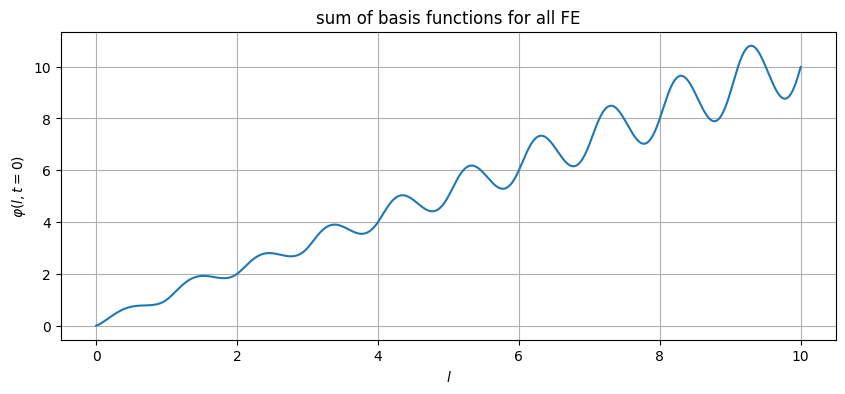

In [503]:
Ne = 10
dl = 1
a = np.array([0,1,12,1,2,13])
for i in range(Ne):
    a1 = np.concatenate([a[-3:],[i+2,2+i,14+i]])
    a = np.concatenate([a,a1])

p = []
for i in range(6):
    p.append(np.poly1d(C_val[i]))

x_one = np.arange(0,1,1e-3)
x_len = len(x_one)
for j in range(Ne):
    y_one = np.zeros((1,x_len))[0]
    for obj,i in zip(p,np.arange(6)):
        y_one = y_one + np.polyval(obj,x_one)*a[i+j*6]
    if not j:
        y = y_one    
        x = np.arange(0,1,1e-3)*dl
    else:
        y = np.concatenate([y,y_one])
        x = np.concatenate([x,x[-x_len:]+dl])
plt.subplots(1,1,figsize = (10,4))
# plt.plot(x_phi,val_phi)
plt.plot(x,y)
plt.grid(True)
plt.xlabel("$l$")
plt.ylabel("$\\varphi(l,t=0)$")
plt.title("sum of basis functions for all FE")
plt.show()

#### Approximation of given phi function by finite elements (test C matrix or psi functions bases)

In [49]:
import sys 
import sympy as sm
# del flex_body_instance
# del sys.modules["dynastatflex"]
import dynastatflex
flex_beam_instance = dynastatflex.Flex_beam(L=0.02,E=2.95*1e9,h=0.01,w=0.0005)
flex_beam_instance.Create_Simulation(disp=False)
flex_beam_instance.FEM(Ne=20,disp=False)
flex_beam_instance.Simulating.Ldivide(step_mult=1,disp=True)
l = sm.symbols("l")
phi = 0.6*(1.7*sm.sin(1.7e-1*l)+0.3*(sm.exp(l/10))-0.3)
flex_beam_instance.Simulating.set_phi(phi,disp=False)
flex_beam_instance.Simulating.create_a(disp=False)
# flex_beam_instance.Simulating.show_one_element_approx(e=5)

<IPython.core.display.Math object>

In [50]:
flex_beam_instance.Simulating.phi_approx_preparing(der_num=2)

Optimization wasn't. Don't have a approximation!We will use a created by create_a fun!
evaluation time: 3051.0 us
time for 1 step: 3048.0 ns


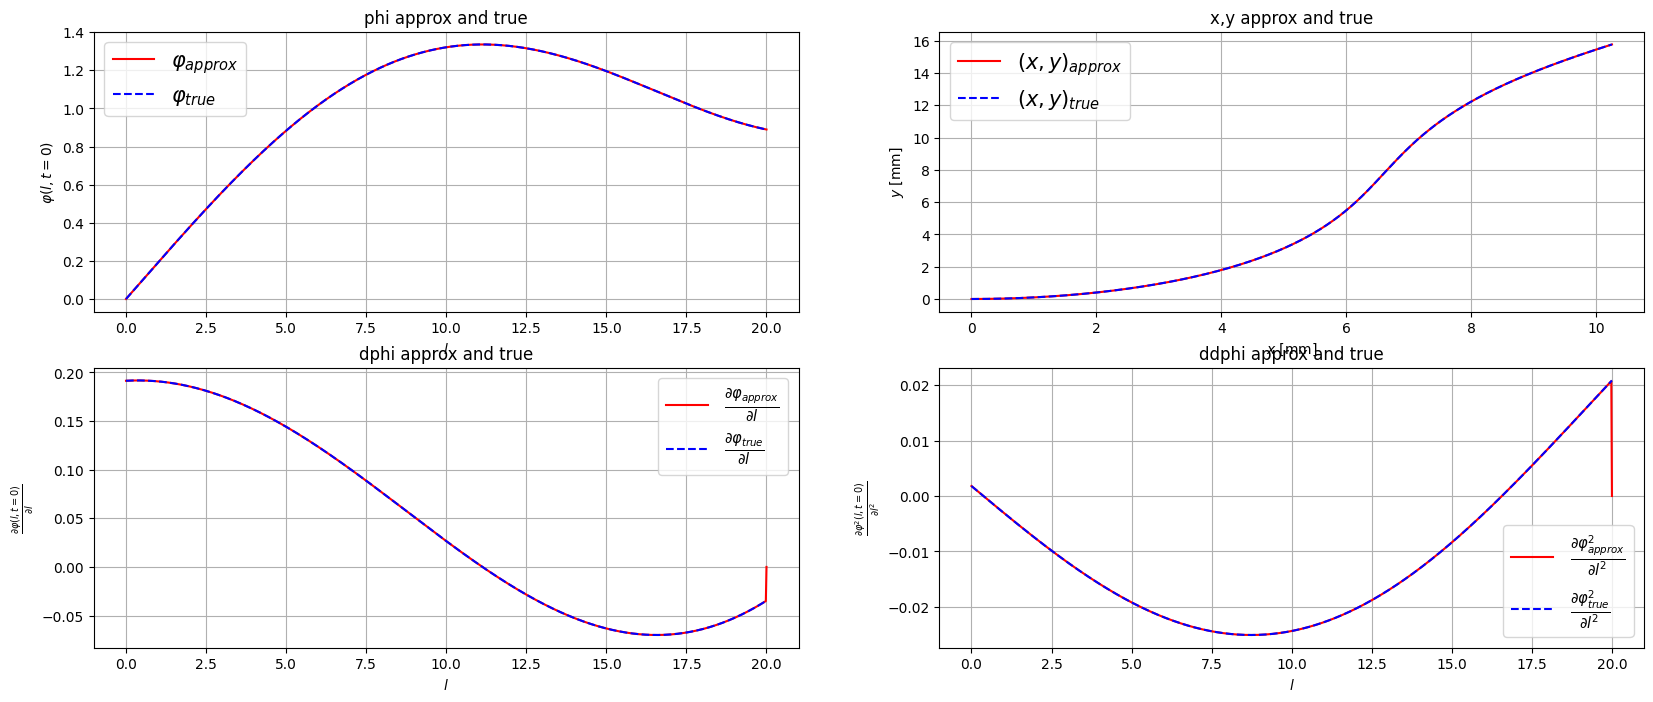

In [69]:
flex_beam_instance.Simulating.phi_approx(disp_time=True,der_num=2)

In [ ]:

a0 = np.array([0.44584879,0.28704035,0.41002227,0.48640483,-0.02378148,0.8553858,0.08721603,0.04077981,1.01688852,0.07782734,0.02472877,1.07340978,0.09319819,0.01512953,1.08550036,0.10397254,0.01233037,1.09153201,0.11577704,0.01529716,1.08920455,0.13473095,0.03009563,1.0672586,0.12939623,0.0608087,1.13719173,0.22634223,0.11276199,1.24417473])
# a0 = np.array([0.54716727,0.14166142,0.45953198,0.73860846,-0.23974336,0.80509678,0.16614556,-0.0874239,1.04391679,0.00395172,-0.04306328,1.14646142,-0.03267354,-0.03804825,1.15281883,-0.03210473,-0.03892706,1.15139352,-0.03085558,-0.0391712,1.15120875,-0.03074385,-0.03918766,1.15120459,-0.0307429,-0.03918752,1.15120516,-0.03074331,-0.0391874,1.15120528,-0.03074348,-0.03918746,1.15120528,-0.03074343,-0.03918743,1.15120491,-0.03074355,-0.03918746,1.15119032,-0.03075098,-0.0391886,1.15106588,-0.03083216,-0.03920796,1.15170623,-0.03064048,-0.03926719,1.16539435,-0.02362461,-0.03823467,1.1873486,-0.01756641,-0.03199311,1.02898062,0.00332973,-0.01159145,1.44187508,0.48726824,0.13507458,1.17745551])
flex_beam_instance.Simulating.static(1,2e-2)

In [454]:
str_a = np.str_( np.round(flex_beam_instance.Simulating.get_a_diff(),8)).replace('\n', ' ').replace(' ',',').replace(',,,,',',').replace(',,,',',').replace(',,',',') 
print( str_a[0] + str_a[2:])# + str_a[-1] )
# print(len(np.round(flex_beam_instance.Simulating.get_a_diff(),3)))

[0.44584879,0.28704035,0.41002227,0.48640483,-0.02378148,0.8553858,0.08721603,0.04077981,1.01688852,0.07782734,0.02472877,1.07340978,0.09319819,0.01512953,1.08550036,0.10397254,0.01233037,1.09153201,0.11577704,0.01529716,1.08920455,0.13473095,0.03009563,1.0672586,0.12939623,0.0608087,1.13719173,0.22634223,0.11276199,1.24417473]


In [455]:
a_approx = flex_beam_instance.Simulating.get_a_approx()
# a_approx = np.array([0.,1.398054,0.522382,0.984477,-0.24426,0.254438,0.984477,-0.24426,0.254438,1.000862,-0.248743,0.255066,1.000862,-0.248743,0.255066,0.999999,-0.248574,0.255055,0.999999,-0.248574,0.255055,1.,-0.248575,0.255055,1.,-0.248575,0.255055,1.,-0.248575,0.255055,1.,-0.248575,0.255055,1.,-0.248574,0.255055,1.,-0.248574,0.255055,0.999948,-0.248585,0.255054,0.999948,-0.248585,0.255054,0.993998,-0.249492,0.254917,0.993998,-0.249492,0.254917,1.206959,-0.150128,0.269416,1.206959,-0.150128,0.269416,2.049172,1.177882,0.710173])
str_a = np.str_( np.round(a_approx,6)).replace('\n', ' ').replace(' ',',').replace(',,,,',',').replace(',,,',',').replace(',,',',') 
print( str_a[0] + str_a[2:] )
# print(len(a_approx))

[0.,-0.445849,0.28704,0.410022,0.486405,-0.023781,0.410022,0.486405,-0.023781,0.855386,0.087216,0.04078,0.855386,0.087216,0.04078,1.016889,0.077827,0.024729,1.016889,0.077827,0.024729,1.07341,0.093198,0.01513,1.07341,0.093198,0.01513,1.0855,0.103973,0.01233,1.0855,0.103973,0.01233,1.091532,0.115777,0.015297,1.091532,0.115777,0.015297,1.089205,0.134731,0.030096,1.089205,0.134731,0.030096,1.067259,0.129396,0.060809,1.067259,0.129396,0.060809,1.137192,0.226342,0.112762,1.137192,0.226342,0.112762,1.244175,0.,0.,]


In [373]:
flex_beam_instance.Simulating.set_a_approx(a_approx)

Optimization wasn't. Don't have a approximation!
evaluation time:220.0 ms
time for 1 step:220.0 us


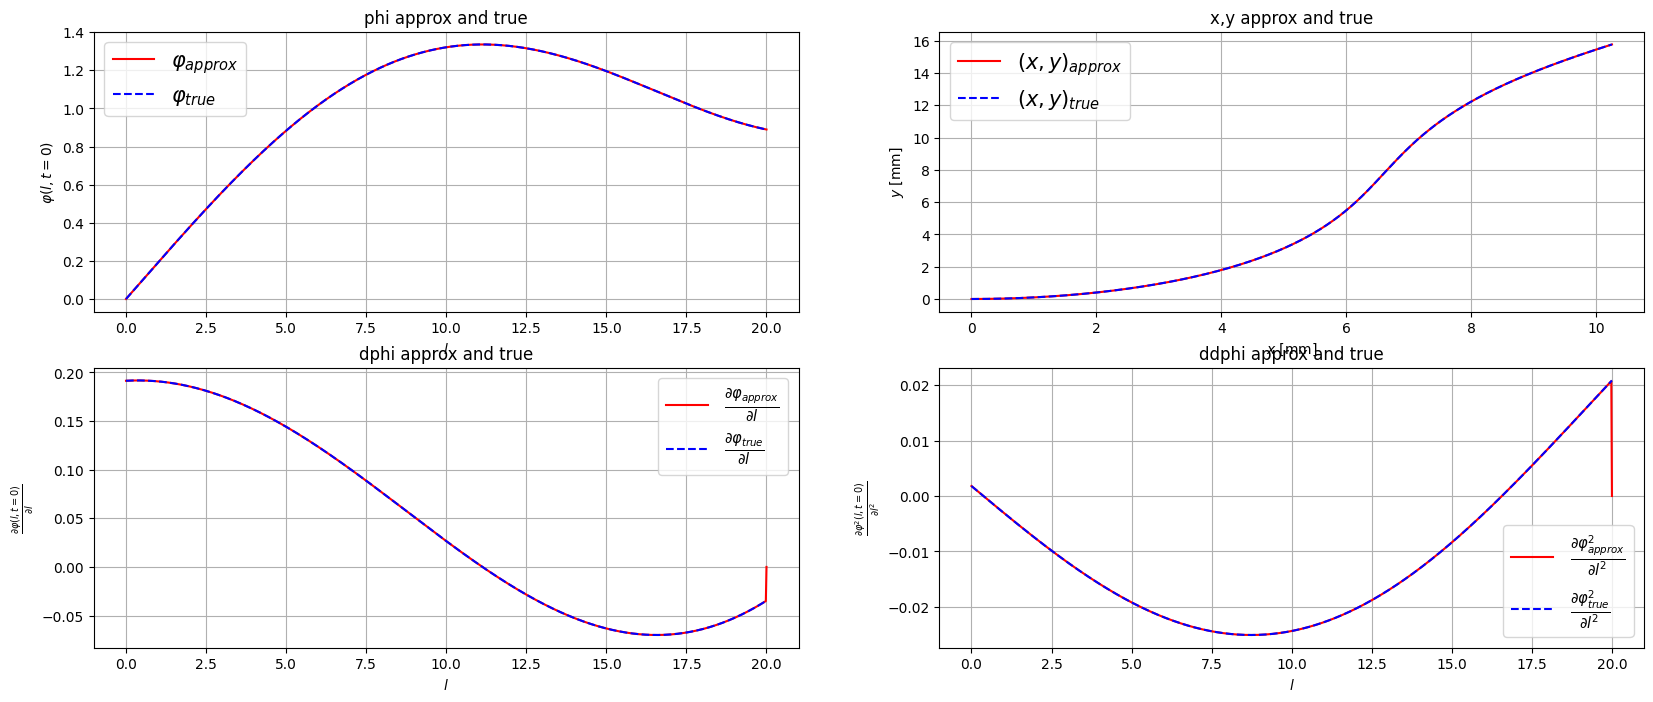

In [5]:
flex_beam_instance.Simulating.phi_approx(disp_time=True,der_num=2)

## delta derivative

In [11]:
import sympy as sm
from IPython.display import display, Math
l,e,dl = sm.symbols("l e dl")
delta = (1-sm.tanh((l-dl)/e)**2)/2/e
display(Math('\\LARGE'+sm.latex(delta)))    
ddelta = sm.diff(delta,l)
display(Math('\\LARGE'+sm.latex(ddelta)))    
dddelta = sm.diff(ddelta,l)
display(Math('\\LARGE'+sm.latex(dddelta)))   

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# New something